In [18]:
import pickle
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')
%matplotlib inline

In [19]:
with open('hardware.pickle', 'rb') as read_file:
     df = pickle.load(read_file)

In [9]:
df.head()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,270.0,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,3645.95,heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,3664.00,astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,3807.00,astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,360.0,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4273.00,heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,319.5,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4449.00,rec,sma,6


In [20]:
ab = sm.tools.eval_measures.meanabs(df['Monthly Output'],df['Price'])

In [21]:
ab

15077.504583333333

In [27]:
df.head(5)

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,270.0,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,3645.95,heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,3664.00,astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,3807.00,astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,360.0,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4273.00,heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,319.5,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4449.00,rec,sma,6


In [30]:
df['Price'].isnull().sum()

0

In [31]:
df.count()

System            120
SKU               120
Array Size        120
Monthly Output    120
Modules           120
Inverter          120
Price             120
MOD OEM           120
INV OEM           120
Module Qty        120
dtype: int64

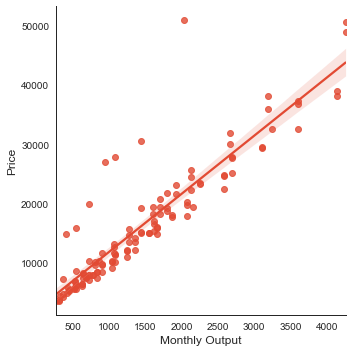

In [36]:
sns.set_style('white')
lm = sns.lmplot(x='Monthly Output',y='Price',data=df)
plt.savefig('lmplot.png')
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
X1 = df['Monthly Output'].values.reshape(-1,1)
y1 = df['Price']

In [41]:
linreg_model = LinearRegression()
linreg_model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
linreg_model.coef_

array([9.77704799])